# Predicting U.S. 2016 Presidential Primary Election Results

Dataset: https://www.kaggle.com/benhamner/2016-us-election?select=primary_results.csv 

Group: STICS

Group Members: Bradley Van Egeren, Siddarth Babu, Maria Perkkio, Jan Roessler

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import *
import scipy

# The Dataset

This project was conducted using two datasets. The first dataset "results" contains the results of the 2016 Presidential Primary Election, categorized by State and by county. Throughout this project we will primarily focus on predicting the political party that won a respective county/state rather than predictingf a specific candidate. 
The second dataset used to make predictions was the "demographics" dataset. This dataset contains the demograohic makeup of each individual county within the United States. The main demographic characteristics discussed within our analysis are age, gender, race, economic conditions and level of eductation. 

Additionally, it needs to be pointed out that historically, polls based models have outperformed fundamentals based models in forecasting elections. However, fundamental data was the only data readily available. Yet, results have to be interpreted with caution. Furthermore, another concern (and one reason why they tend to perform worse compared to polls based models) is that there have been very few presidential elections in US history, providing little training data.
This is especially true when we consider the fact that the political party structure has consistently changed over time. The modern version of Democrats and Republicans only came into existence around 1980, leading to 10 past elections including 2016.
As a result fundamentals based models tend to overfit past data and perform poorly when trying to predict the future.

The United States’ Presidential Election is arguably, one of the most important elections in the world. With the 2020 presidential election results wrapping up, our group wanted to see if we could predict the results of a previous election. The 2016 presidential election results showed that news sources predictions were extremely inaccurate which left people in shock. Which made us ask why the 2016 results were so inaccurate and is it possible to correctly predict the results of the 2016 election. We decided that looking at the results of the primaries by county instead of state would be the best way to decide who would win. Previous research on the 2016 election was conducted by Nicholas Valentino at the University of Michigan. Titled: Polling and Prediction in the 2016 Presidential Election. Valentino assumed at the beginning of his research that sampling errors and false voter models were likely the reason for false predictions. He concluded that polling should not be the sole source of predicting because it will not grab key demographics that will go out and vote on election day. For our project, we wanted to look at another source of data and see if we come to the similar conclusions. 

In [2]:
results = pd.read_csv(r'USElections/primary_results.csv')
demographics = pd.read_csv(r'USElections/county_facts.csv')

In [3]:
results.head(100)

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
...,...,...,...,...,...,...,...,...
95,Alabama,AL,Marshall,1095.0,Democrat,Hillary Clinton,1494,0.621
96,Alabama,AL,Mobile,1097.0,Democrat,Bernie Sanders,5672,0.162
97,Alabama,AL,Mobile,1097.0,Democrat,Hillary Clinton,28927,0.827
98,Alabama,AL,Monroe,1099.0,Democrat,Bernie Sanders,205,0.076


In [4]:
demographics.head(10)

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
5,1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,...,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
6,1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,...,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9
7,1011,Bullock County,AL,10764,10915,-1.4,10914,6.3,21.4,14.9,...,0.0,38.8,0,0,43810,3995,3670,1,622.81,17.5
8,1013,Butler County,AL,20296,20946,-3.1,20947,6.1,23.6,18.0,...,0.0,0.0,399132,56712,229277,11326,28427,2,776.83,27.0
9,1015,Calhoun County,AL,115916,118586,-2.3,118572,5.7,22.2,16.0,...,0.5,24.7,2679991,0,1542981,13678,186533,114,605.87,195.7


In [5]:
len(results)

24611

In [6]:
len(demographics)

3195

In [7]:
results.dtypes

state                  object
state_abbreviation     object
county                 object
fips                  float64
party                  object
candidate              object
votes                   int64
fraction_votes        float64
dtype: object

In [8]:
demographics.dtypes

fips                    int64
area_name              object
state_abbreviation     object
PST045214               int64
PST040210               int64
PST120214             float64
POP010210               int64
AGE135214             float64
AGE295214             float64
AGE775214             float64
SEX255214             float64
RHI125214             float64
RHI225214             float64
RHI325214             float64
RHI425214             float64
RHI525214             float64
RHI625214             float64
RHI725214             float64
RHI825214             float64
POP715213             float64
POP645213             float64
POP815213             float64
EDU635213             float64
EDU685213             float64
VET605213               int64
LFE305213             float64
HSG010214               int64
HSG445213             float64
HSG096213             float64
HSG495213               int64
HSD410213               int64
HSD310213             float64
INC910213               int64
INC110213 

In [9]:
to_keep = ['area_name', 'state_abbreviation', 'PST045214', 'PST120214', 'AGE135214', 'AGE295214', 'AGE775214', 'SEX255214', 'RHI125214', 'RHI225214', 'RHI425214', 'RHI725214', 'POP645213', 'EDU635213', 'EDU685213', 'VET605213', 'HSG445213', 'INC910213', 'INC110213']

In [10]:
demographics = demographics.filter(items=to_keep)

In [11]:
demographics = demographics.rename(columns={'area_name': 'Area Name', 'state_abbreviation': 'State Abbreviation','PST045214': 'Population in 2014', 'PST120214': 'Population Percentage Change', 'AGE135214': '% Under 5', 'AGE295214': '% Under 18', 'AGE775214': '% 65 and Over', 'SEX255214': '% Female', 'RHI125214': '% White', 'RHI225214': '% Black', 'RHI425214': '% Asian', 'RHI725214': '% Latino', 'POP645213': '% Foreign Born', 'EDU635213': '% HS or Higher', 'EDU685213': 'BS or Higher', 'VET605213': '# of Veterans', 'HSG445213': 'HO Rate', 'INC910213': 'Per Capita Inc', 'INC110213': 'Median HH Inc'})

In [12]:
demoUS_States = demographics[demographics['State Abbreviation'].isna()]

In [13]:
demoUS_States = demoUS_States.reset_index()
demoUS_States = demoUS_States.drop(columns='index')

In [14]:
demoUS_States

,Area Name,State Abbreviation,Population in 2014,Population Percentage Change,% Under 5,% Under 18,% 65 and Over,% Female,% White,% Black,% Asian,% Latino,% Foreign Born,% HS or Higher,BS or Higher,# of Veterans,HO Rate,Per Capita Inc,Median HH Inc
0,United States,NaN,318857056,3.3,6.2,23.1,14.5,50.8,77.4,13.2,5.4,17.4,12.9,86.0,28.8,21263779,64.9,28155,53046
1,Alabama,NaN,4849377,1.4,6.1,22.8,15.3,51.5,69.7,26.7,1.3,4.1,3.5,83.1,22.6,388865,69.7,23680,43253
2,Alaska,NaN,736732,3.7,7.4,25.3,9.4,47.4,66.9,3.9,6.1,6.8,7.0,91.6,27.5,71004,63.8,32651,70760
3,Arizona,NaN,6731484,5.3,6.4,24.1,15.9,50.3,83.7,4.7,3.3,30.5,13.4,85.7,26.9,522382,64.4,25358,49774
4,Arkansas,NaN,2966369,1.7,6.5,23.8,15.7,50.9,79.7,15.6,1.5,7.0,4.5,83.7,20.1,237311,66.7,22170,40768
5,California,NaN,38802500,4.2,6.5,23.6,12.9,50.3,73.2,6.5,14.4,38.6,27.0,81.2,30.7,1893539,55.3,29527,61094
6,Colorado,NaN,5355866,6.5,6.3,23.3,12.7,49.8,87.7,4.5,3.1,21.2,9.7,90.2,37.0,399458,65.4,31109,58433
7,Connecticut,NaN,3596677,0.6,5.3,21.6,15.5,51.2,81.2,11.5,4.5,15.0,13.6,89.2,36.5,217947,67.8,37892,69461
8,Delaware,NaN,935614,4.2,6.0,21.8,16.4,51.6,70.8,22.2,3.8,8.9,8.4,87.7,28.9,75081,72.5,29819,59878
9,District Of Columbia,NaN,658893,9.5,6.5,17.5,11.3,52.6,43.6,49.0,4.0,10.4,13.8,88.4,52.4,30520,42.1,45290,65830


# Data Cleaning

The greatest challange while cleaning the data was the inconsistency with county names across different dataframes. Across all different data frames being used, the counties were named differently. This problem forced us to drop certain counties at it was impossible to determine which party had more votes by county. We terefore exclusively focused on counties that were able to be found in all three data sets, which still left us with 1558 different observations.

In [15]:
results.isnull().sum()

state                   0
state_abbreviation      0
county                  0
fips                  100
party                   0
candidate               0
votes                   0
fraction_votes          0
dtype: int64

In [16]:
demographics.isnull().sum()

Area Name                        0
State Abbreviation              52
Population in 2014               0
Population Percentage Change     0
% Under 5                        0
% Under 18                       0
% 65 and Over                    0
% Female                         0
% White                          0
% Black                          0
% Asian                          0
% Latino                         0
% Foreign Born                   0
% HS or Higher                   0
BS or Higher                     0
# of Veterans                    0
HO Rate                          0
Per Capita Inc                   0
Median HH Inc                    0
dtype: int64

In [17]:
demographics = demographics.dropna(axis=0)

In [18]:
demographics = demographics.drop_duplicates(subset=['Area Name'])

In [19]:
demographics = demographics.reset_index()
demographics = demographics.drop(columns='index')

In [20]:
demographics

,Area Name,State Abbreviation,Population in 2014,Population Percentage Change,% Under 5,% Under 18,% 65 and Over,% Female,% White,% Black,% Asian,% Latino,% Foreign Born,% HS or Higher,BS or Higher,# of Veterans,HO Rate,Per Capita Inc,Median HH Inc
0,Autauga County,AL,55395,1.5,6.0,25.2,13.8,51.4,77.9,18.7,1.1,2.7,1.6,85.6,20.9,5922,76.8,24571,53682
1,Baldwin County,AL,200111,9.8,5.6,22.2,18.7,51.2,87.1,9.6,0.9,4.6,3.6,89.1,27.7,19346,72.6,26766,50221
2,Barbour County,AL,26887,-2.1,5.7,21.2,16.5,46.6,50.2,47.6,0.5,4.5,2.9,73.7,13.4,2120,67.7,16829,32911
3,Bibb County,AL,22506,-1.8,5.3,21.0,14.8,45.9,76.3,22.1,0.2,2.1,1.2,77.5,12.1,1327,79.0,17427,36447
4,Blount County,AL,57719,0.7,6.1,23.6,17.0,50.5,96.0,1.8,0.3,8.7,4.3,77.0,12.1,4540,81.0,20730,44145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,Sublette County,WY,10057,-1.9,5.8,24.0,12.6,46.3,94.8,1.3,1.3,8.1,2.9,95.6,23.3,734,74.4,35944,77900
1873,Sweetwater County,WY,45010,2.7,7.3,27.0,9.5,48.1,94.3,1.5,0.9,15.8,5.5,91.0,18.1,3701,71.5,30517,71525
1874,Uinta County,WY,20904,-1.0,7.6,29.8,11.0,49.6,95.4,0.9,0.5,9.2,3.4,89.2,18.9,1359,72.7,25513,58515
1875,Washakie County,WY,8322,-2.5,5.5,23.9,20.1,49.3,94.8,0.8,0.7,13.9,5.0,90.5,23.6,752,71.7,28308,47104


In [21]:
counties = demographics['Area Name'].unique()

In [22]:
len(counties)

1877

In [23]:
repResults = results[results['party'] == 'Republican']

In [24]:
repResults = repResults.reset_index()
repResults = repResults.drop(columns='index')

In [25]:
repCounties = repResults['county'].unique()

In [26]:
len(repCounties)

2215

In [27]:
repCountyResults = []

for county in repCounties:
    countyResult = repResults.loc[repResults['county'] == county, 'votes'].sum()
    repCountyResults.append(countyResult) 

In [28]:
len(repCountyResults)

2215

In [29]:
repVotesByCounty = dict(zip(repCounties, repCountyResults))

In [30]:
demResults = results[results['party'] == 'Democrat']

In [31]:
demResults = demResults.reset_index()
demResults = demResults.drop(columns='index')

In [32]:
demCounties = demResults['county'].unique()

In [33]:
len(demCounties)

2622

In [34]:
demCountyResults = []

for county in demCounties:
    countyResult = demResults.loc[demResults['county'] == county, 'votes'].sum()
    demCountyResults.append(countyResult) 

In [35]:
len(demCountyResults)

2622

In [36]:
demVotesByCounty = dict(zip(demCounties, demCountyResults))

In [37]:
counties2 = counties 

for county in counties:
    if county.find('County') == -1:
        counties2 = np.delete(counties2, np.argwhere(counties2 == county))
        
print(len(counties2))

1741


In [38]:
newDemCounties = []
for i in range(0, len(demCounties)):
    newDemCounties = np.append(demCounties[i], demCounties + ' County')

np.delete(newDemCounties, 0)

array(['Autauga County', 'Baldwin County', 'Barbour County', ...,
       'Sweetwater County', 'Uinta County', 'Washakie County'],
      dtype=object)

In [39]:
newRepCounties = []
for i in range(0, len(repCounties)):
    newRepCounties = np.append(repCounties[i], repCounties + ' County')

np.delete(newRepCounties, 0)

array(['Autauga County', 'Baldwin County', 'Barbour County', ...,
       'Sweetwater-Carbon County', 'Teton-Sublette County',
       'Uinta-Lincoln County'], dtype=object)

In [40]:
finalCounties2 = []

for county in counties2:
    if county in newDemCounties and county in newRepCounties:
        finalCounties2.append(county)

In [41]:
print(len(finalCounties2))


1558


In [42]:
countyWinner = []

for county in finalCounties2:
    if county.find('County') != -1:
        county = county.replace(' County', '')
        #print(county)
    if demVotesByCounty[county] > repVotesByCounty[county]:
        countyWinner.append("D")           
    else:
        countyWinner.append("R")

In [43]:
winners = dict(zip(finalCounties2, countyWinner))

In [45]:
#winners

In [46]:
demographics = demographics[demographics['Area Name'].isin(finalCounties2)]

In [47]:
demographics['Winning Party'] = countyWinner

<ipython-input-47-2a28ee903b6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographics['Winning Party'] = countyWinner


In [48]:
demographics

,Area Name,State Abbreviation,Population in 2014,Population Percentage Change,% Under 5,% Under 18,% 65 and Over,% Female,% White,% Black,% Asian,% Latino,% Foreign Born,% HS or Higher,BS or Higher,# of Veterans,HO Rate,Per Capita Inc,Median HH Inc,Winning Party
0,Autauga County,AL,55395,1.5,6.0,25.2,13.8,51.4,77.9,18.7,1.1,2.7,1.6,85.6,20.9,5922,76.8,24571,53682,R
1,Baldwin County,AL,200111,9.8,5.6,22.2,18.7,51.2,87.1,9.6,0.9,4.6,3.6,89.1,27.7,19346,72.6,26766,50221,R
2,Barbour County,AL,26887,-2.1,5.7,21.2,16.5,46.6,50.2,47.6,0.5,4.5,2.9,73.7,13.4,2120,67.7,16829,32911,R
3,Bibb County,AL,22506,-1.8,5.3,21.0,14.8,45.9,76.3,22.1,0.2,2.1,1.2,77.5,12.1,1327,79.0,17427,36447,R
4,Blount County,AL,57719,0.7,6.1,23.6,17.0,50.5,96.0,1.8,0.3,8.7,4.3,77.0,12.1,4540,81.0,20730,44145,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,Waupaca County,WI,52066,-0.7,5.2,21.2,19.5,49.7,97.4,0.4,0.5,3.0,1.6,89.9,16.6,4961,76.1,25956,50822,R
1865,Waushara County,WI,24178,-1.3,4.8,18.7,22.5,47.3,95.5,2.1,0.5,6.4,2.4,87.0,14.3,2616,81.1,22888,43070,R
1867,Goshen County,WY,13514,2.0,5.6,20.1,20.5,47.9,95.9,1.2,0.7,10.4,2.4,89.3,20.5,1258,75.7,23475,43257,D
1869,Laramie County,WY,96389,4.9,6.5,23.5,14.3,49.6,91.3,3.4,1.3,14.3,2.8,93.3,25.1,12064,68.2,28505,55864,R


In [49]:
corrTest = demographics[['Population in 2014', 'Population Percentage Change', '% Under 5', '% Under 18', '% 65 and Over', '% Female', '% White', '% Black', '% Asian', '% Latino', '% Foreign Born', '% HS or Higher', 'BS or Higher', '# of Veterans', 'HO Rate', 'Per Capita Inc', 'Median HH Inc']]

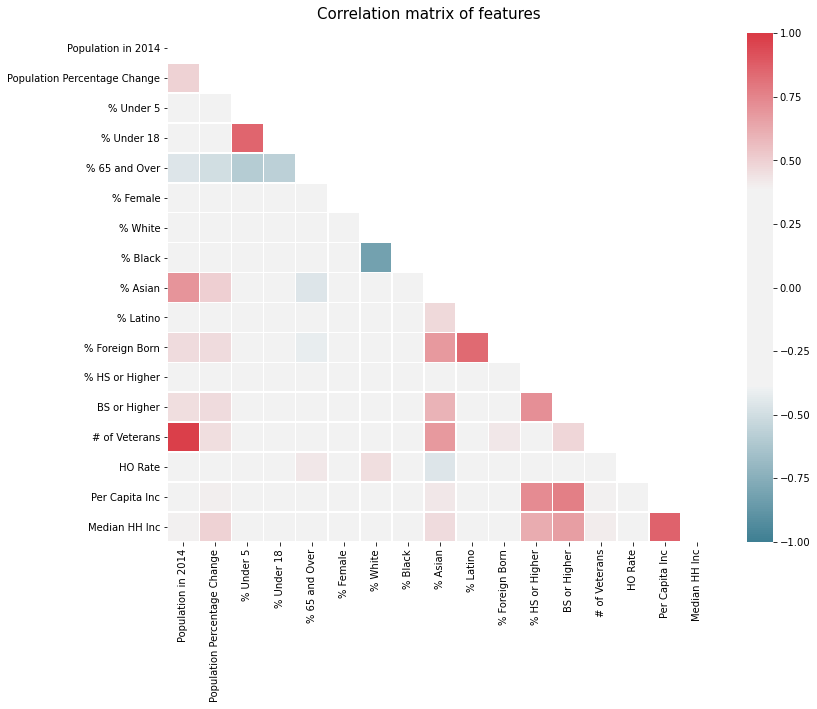

In [50]:
corr = corrTest.corr(method='spearman')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12, 10))

cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)

fig.tight_layout()

When more than two features are used for prediction, you must consider the possibility of each features interacting with one another. 

The situation in which features are correlated with one another is called muticollinearity. Under multicollinearity, the values of individual regression coefficients are unreliable, and the impact of individual features on a response variable is obfuscated. However, prediction on a response variable is still reliable.

# The Model

Random forests use decision trees as the basic building block to enable prediction. A decision tree uses a tree- like graph or model of decisions to split up the feature space into separate regions. Each data point falls into exactly one region, and in the case of classification, the most common class is the predicted class.
Random forests use multiple decision trees, and the reasoning behind this is to reduce the chances of overfitting to the data. Each tree is built on a separate dataset where each dataset is sampled from the original distribution. However, since we do not know, or have access to, the original distribution, we build each dataset by sampling with replacement using the original dataset. This is known as bootstrap aggregation, since we now have multiple decision trees which are all fit to an approximation of the original distribution. By using multiple trees we can lower the variance of the model at the cost of increasing the bias.

Random Forests clearly works better than the SVM classifier while attempting binary classification with a small number of data points (and hence a high possibility of over-fitting). The average classification test error rate for Random Forests is 8.9%, while for the other two algorithms it is 11.1%.

Most importantly, previous research has shown that the 2010, 2012 and 2014 Senate elections were predictable, with a reasonable amount of accuracy with data that was mostly available at least two years in advance of those elections.

In [51]:
data = demographics[['Population in 2014', 'Population Percentage Change', '% Under 5', '% Under 18', '% 65 and Over', '% Female', '% White', '% Black', '% Asian', '% Latino', '% Foreign Born', '% HS or Higher', 'BS or Higher', '# of Veterans', 'HO Rate', 'Per Capita Inc', 'Median HH Inc']]

In [52]:
labels = demographics['Winning Party']

In [53]:
RSEED = 50
from sklearn.model_selection import train_test_split

# Extract the labels not needed because we have seperate dataframe for labels

# 33% examples in test data
train, test, train_labels, test_labels = train_test_split(data, labels, 
                                                          stratify = labels,
                                                          test_size = 0.33, 
                                                          random_state = RSEED)

train_labels = np.uint8(train_labels == 'R')
test_labels = np.uint8(test_labels == 'R')

In [54]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=50,
                       verbose=1)

In [55]:
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [56]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print('{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
        
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    
print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, rf_probs)}')

Test ROC AUC  Score: 0.8099278432688678


{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}
{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}
{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}


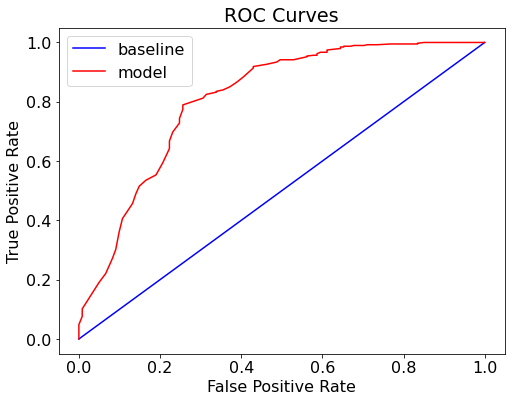

In [57]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

In [58]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[ 50  71]
 [ 15 379]]


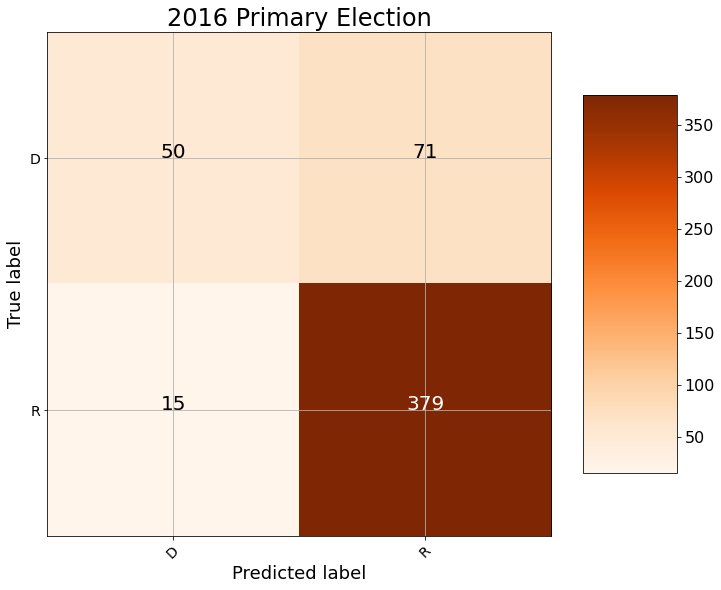

In [59]:
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['D', 'R'],
                      title = '2016 Primary Election')

Feature ranking:
1. feature 14 (0.091214)
2. feature 6 (0.090802)
3. feature 9 (0.081368)
4. feature 12 (0.068476)
5. feature 0 (0.060781)
6. feature 8 (0.060265)
7. feature 7 (0.058749)
8. feature 15 (0.055453)
9. feature 10 (0.054907)
10. feature 3 (0.053623)
11. feature 16 (0.051690)
12. feature 1 (0.050867)
13. feature 11 (0.050564)
14. feature 13 (0.048937)
15. feature 4 (0.046039)
16. feature 2 (0.038177)
17. feature 5 (0.038086)


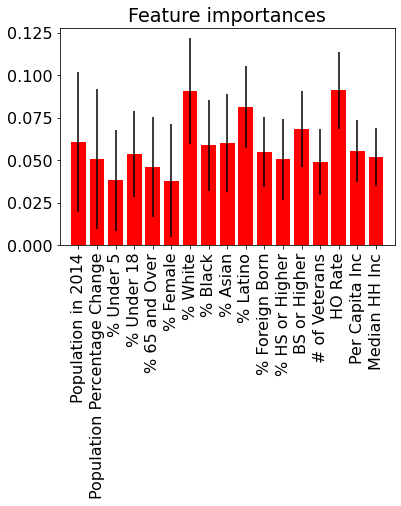

In [60]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train.shape[1]), importances,
        color="r", yerr=std[indices], align="center")
plt.xticks(range(train.shape[1]), ['Population in 2014', 'Population Percentage Change', '% Under 5', '% Under 18', '% 65 and Over', '% Female', '% White', '% Black', '% Asian', '% Latino', '% Foreign Born', '% HS or Higher', 'BS or Higher', '# of Veterans', 'HO Rate', 'Per Capita Inc', 'Median HH Inc'], rotation='vertical')
plt.xlim([-1, train.shape[1]])
plt.show()

NameError: name 'tree' is not defined

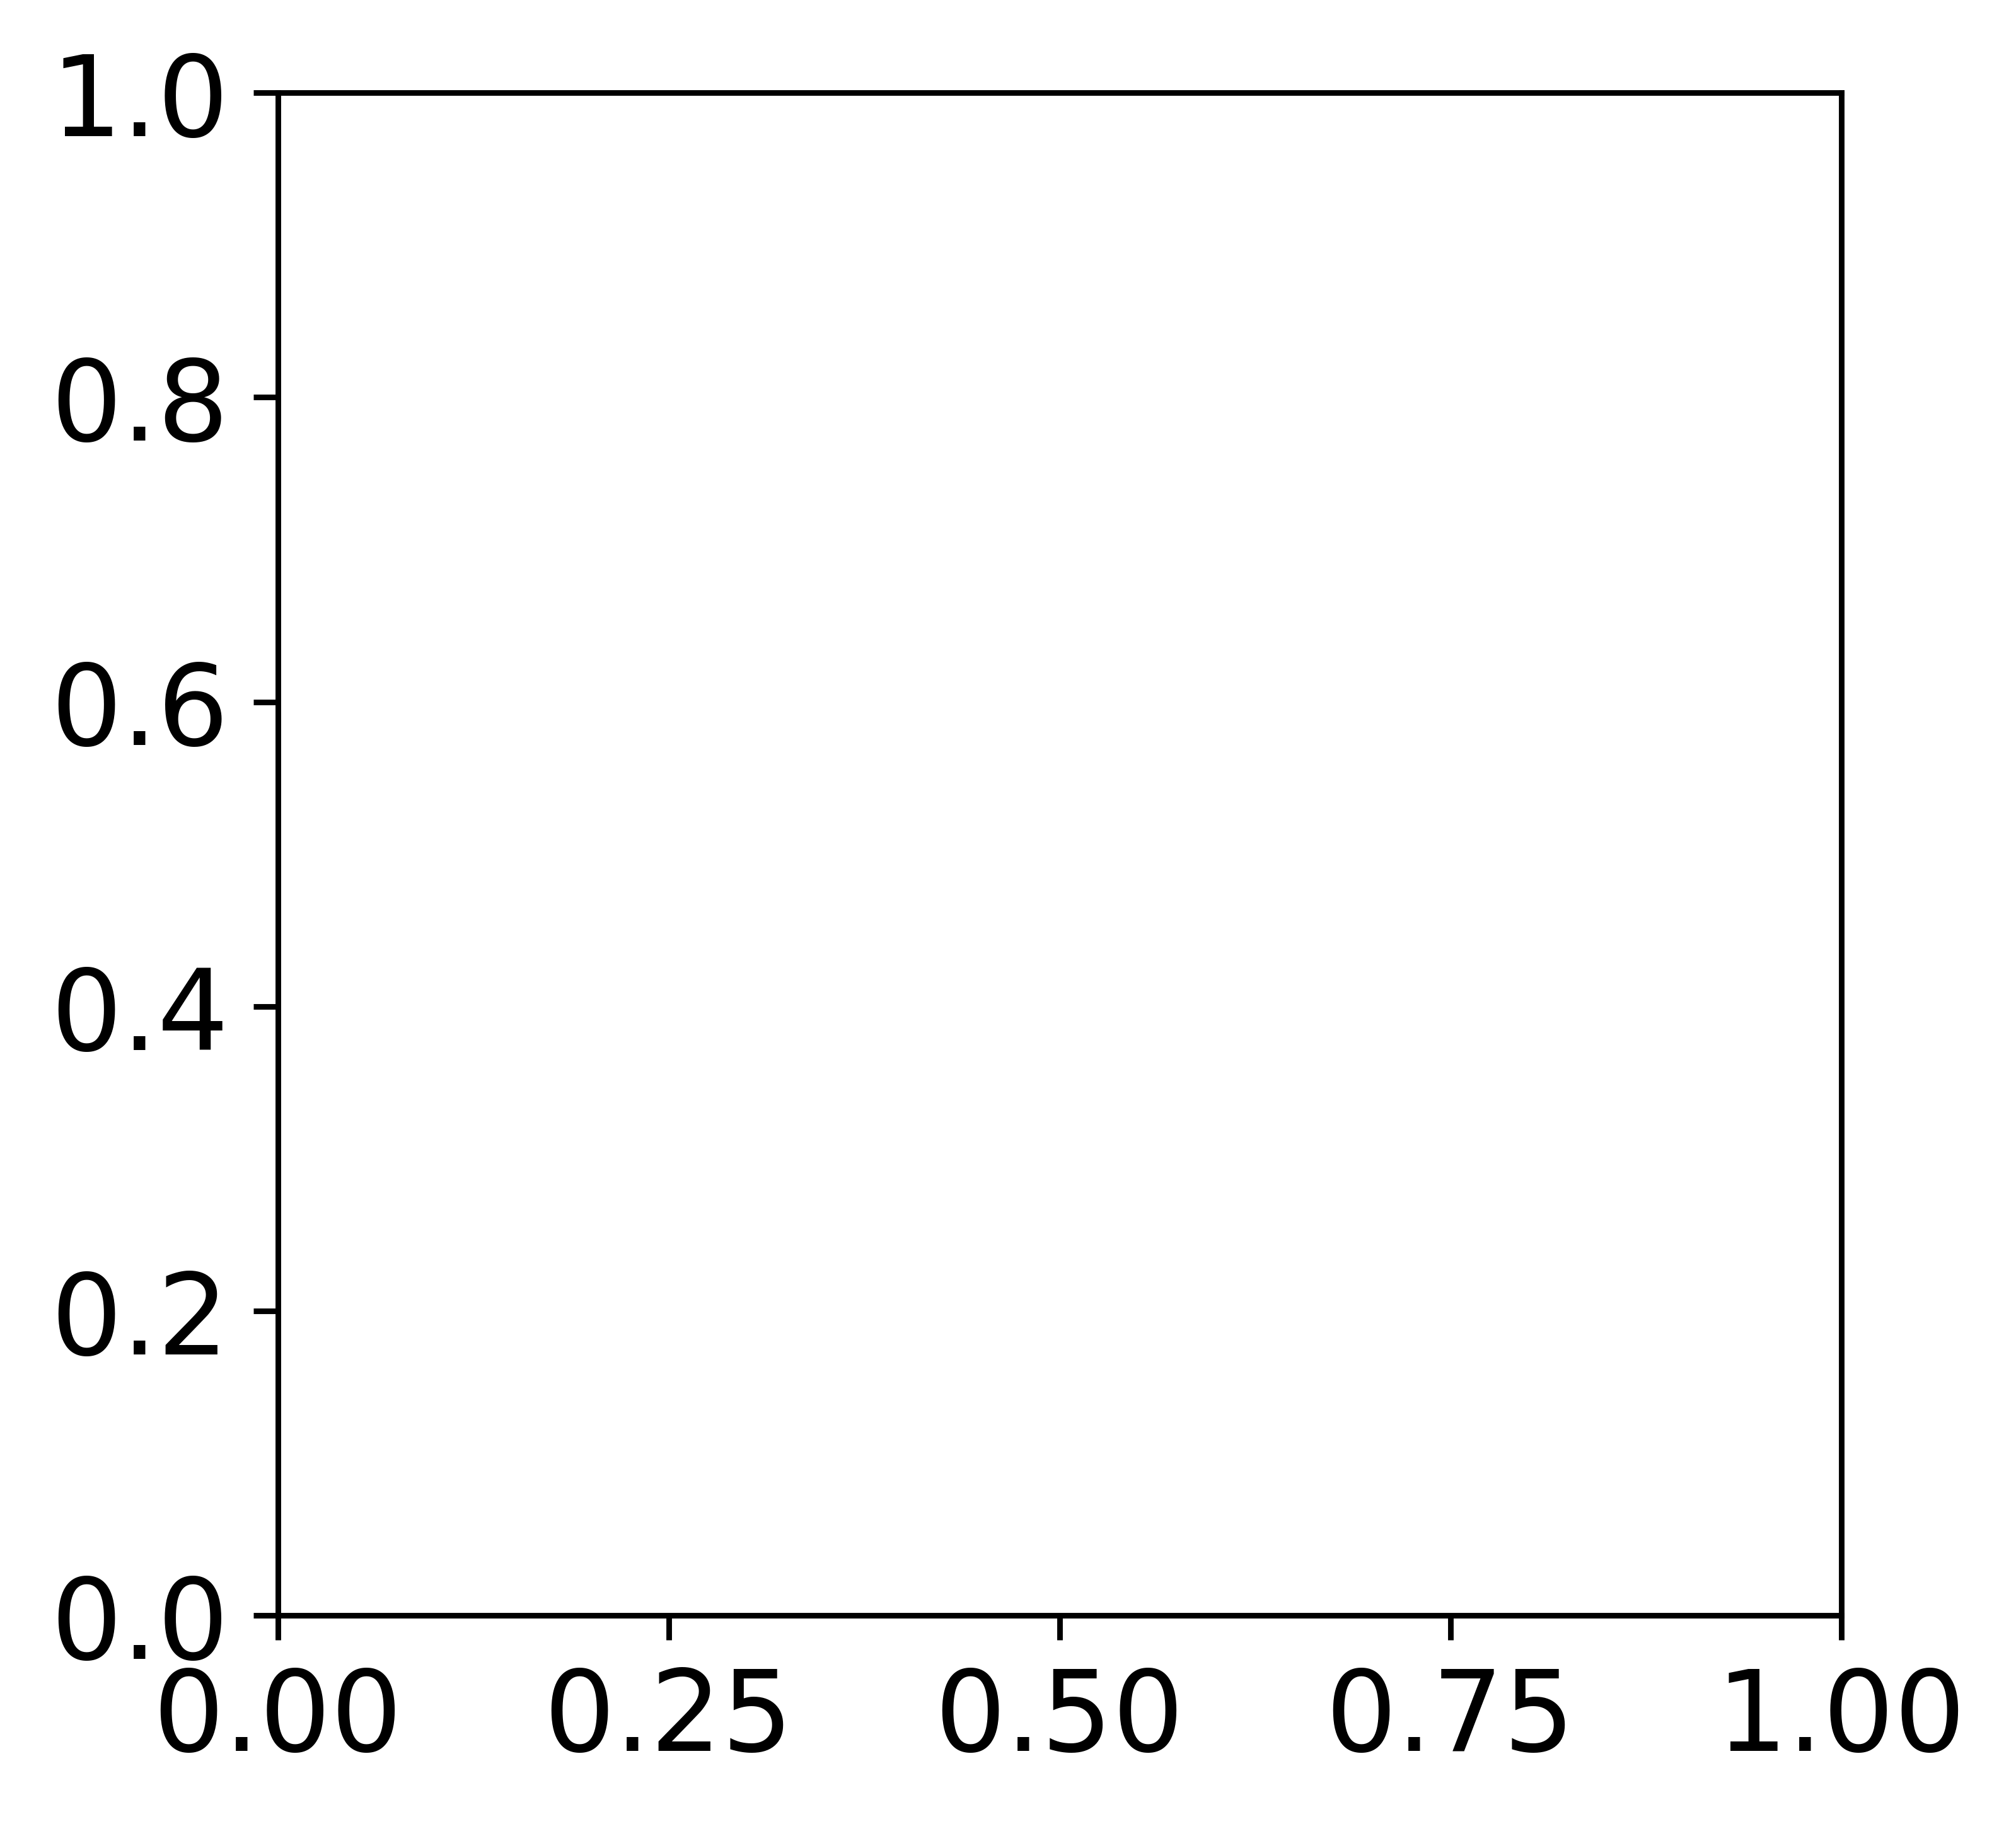

In [61]:
fn=data.columns
cn=labels
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

Text(0.5, 1.0, 'Bachelor Degree or Higher by State')

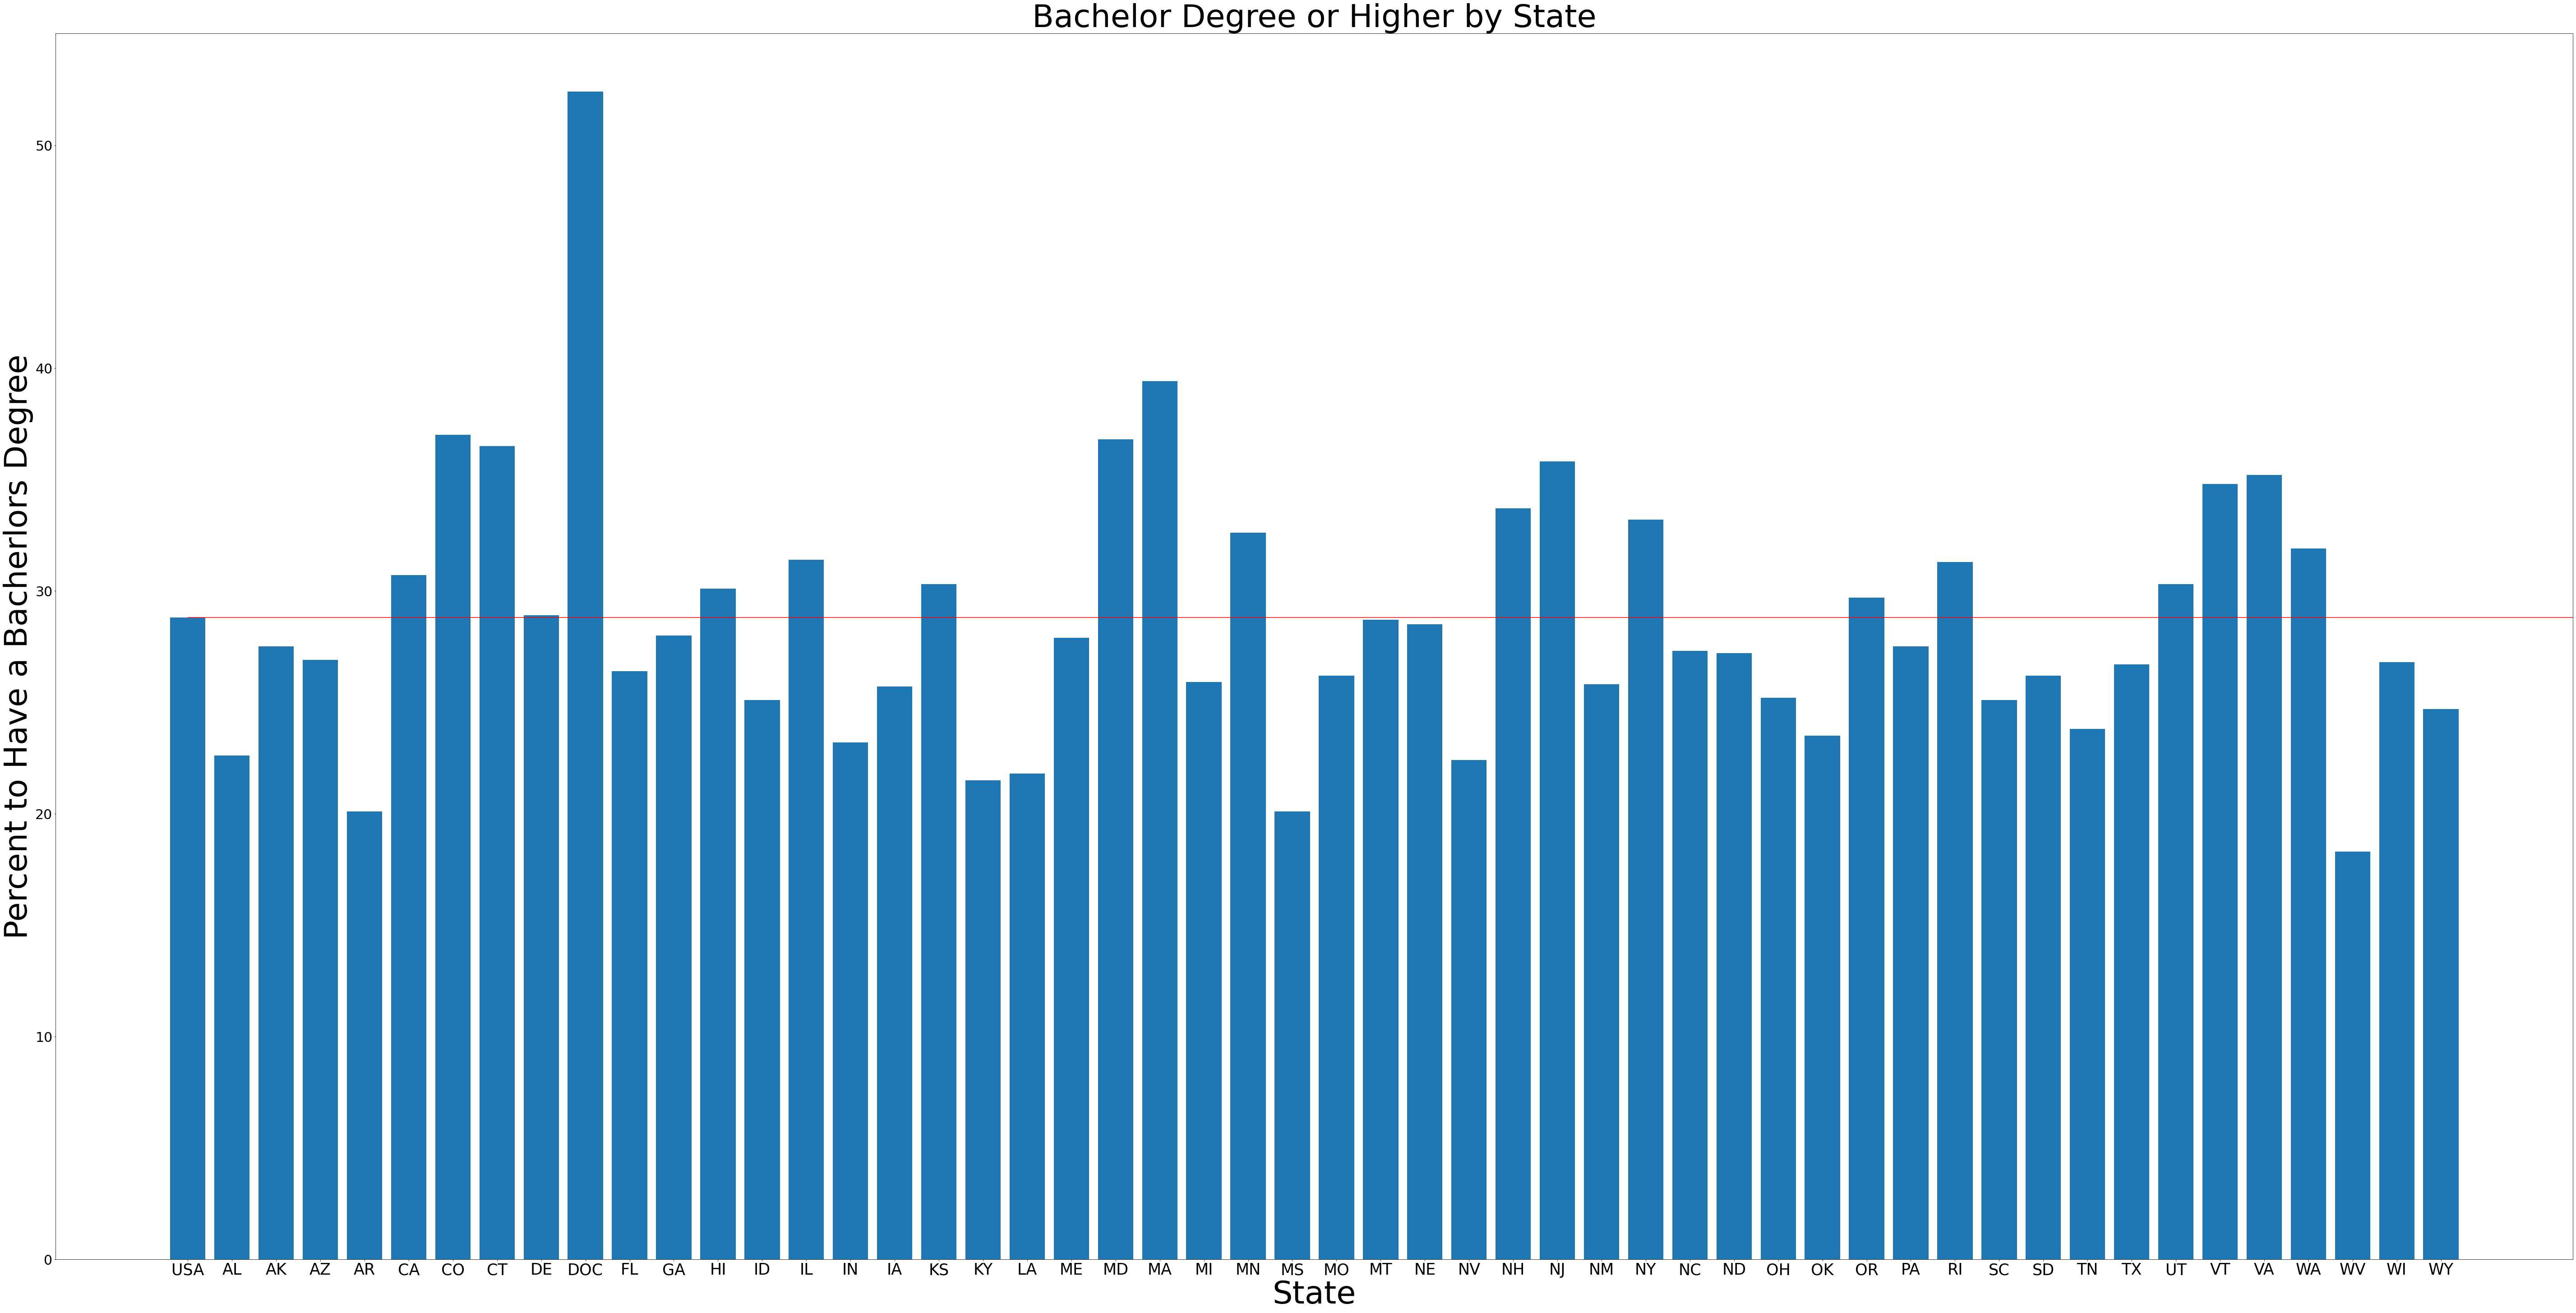

In [76]:
demoUS_States.drop(0)
state = demoUS_States['Area Name']
STavg = demoUS_States['BS or Higher']
abr = ['USA', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DOC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
plt.figure(figsize = (100,50))
plt.hlines(y = 28.8, xmin = 0, xmax = 500, color = 'red', linestyle = 'solid', label = 'United States Avg' )
ax = plt.bar(state, STavg)
plt.xticks(state, abr, fontsize = 35)
plt.xlabel('State', fontsize = 70)
plt.ylabel('Percent to Have a Bacherlors Degree', fontsize = 70)
plt.title("Bachelor Degree or Higher by State", fontsize = 70)

In [67]:
uniqueRepStates = repResults['state_abbreviation'].unique()
    
uniqueRepStates

allRepVotes = []

for states in uniqueRepStates:
    newResults = repResults.loc[repResults['state_abbreviation'] == states, 'votes'].sum()
    allRepVotes.append(newResults) 
allRepVotes
uniqueRepStates

repVotesByState = dict(zip(uniqueRepStates, allRepVotes))

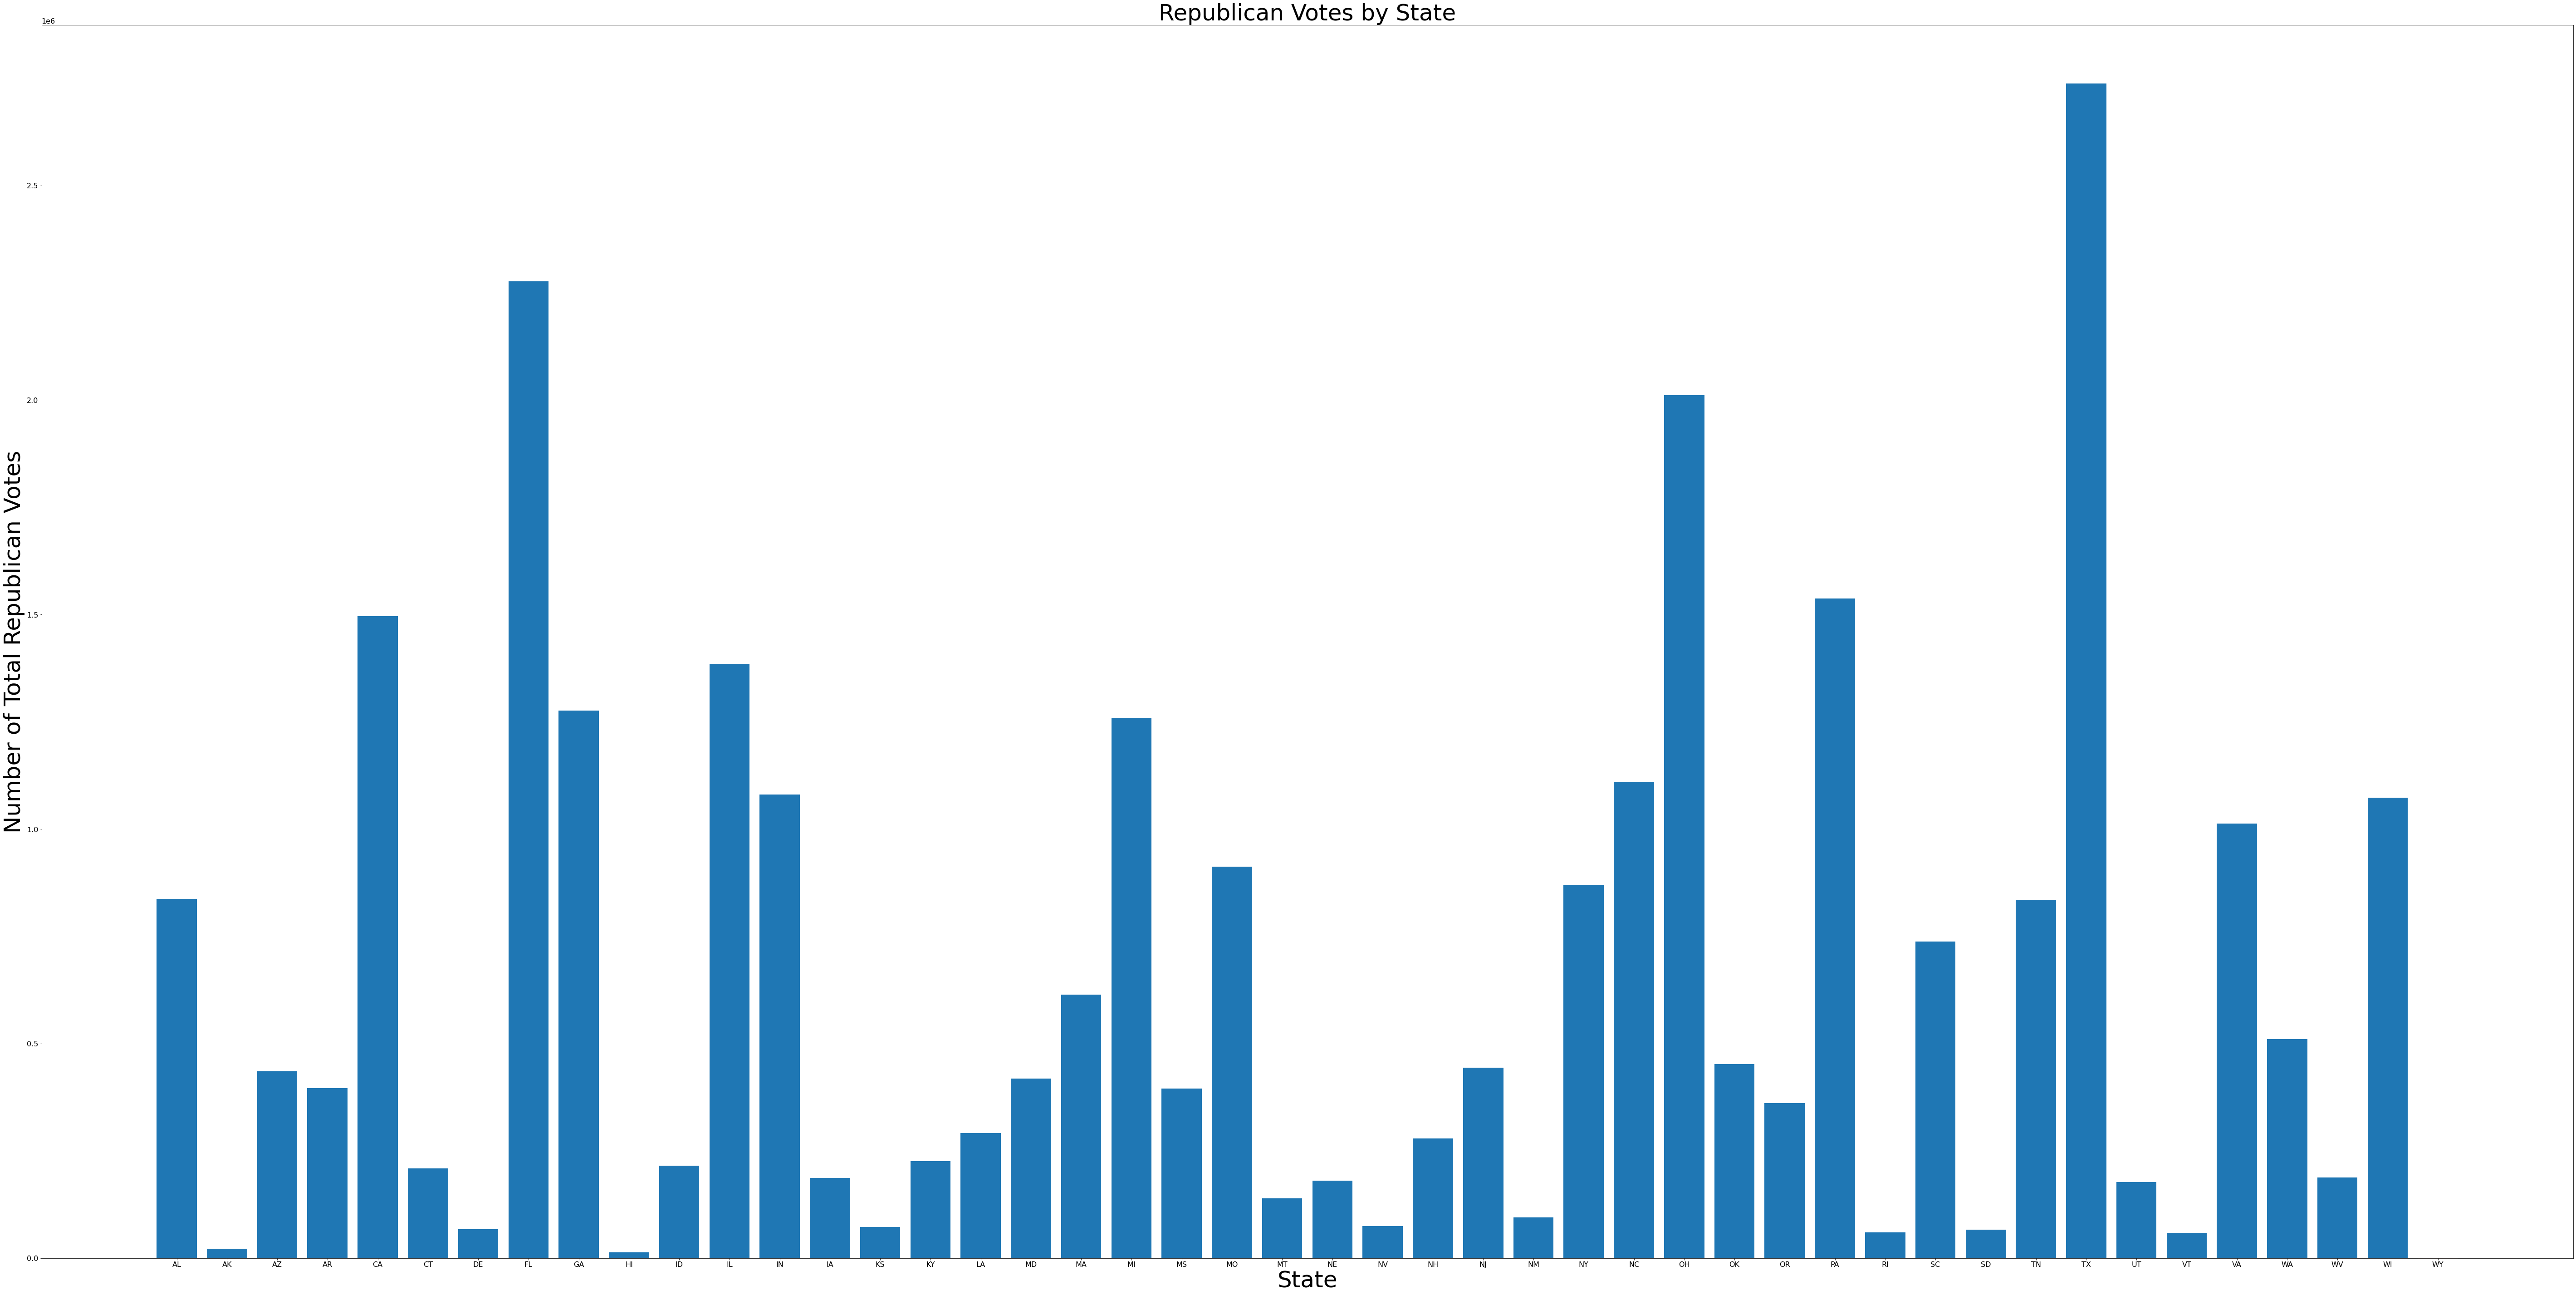

In [68]:
plt.figure(figsize = (100,50))
plt.bar(range(len(repVotesByState)), list(repVotesByState.values()), align='center')
plt.xticks(range(len(repVotesByState)), list(repVotesByState.keys()))

plt.xlabel('State', fontsize = 50)
plt.ylabel('Number of Total Republican Votes', fontsize = 50)
plt.title("Republican Votes by State", fontsize = 50)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 

In [69]:
uniqueDemStates = demResults['state_abbreviation'].unique()

allDemVotes = []

for states in uniqueDemStates:
    newResults = demResults.loc[demResults['state_abbreviation'] == states, 'votes'].sum()
    allDemVotes.append(newResults) 
allDemVotes
uniqueDemStates

demVotesByState = dict(zip(uniqueDemStates, allDemVotes))


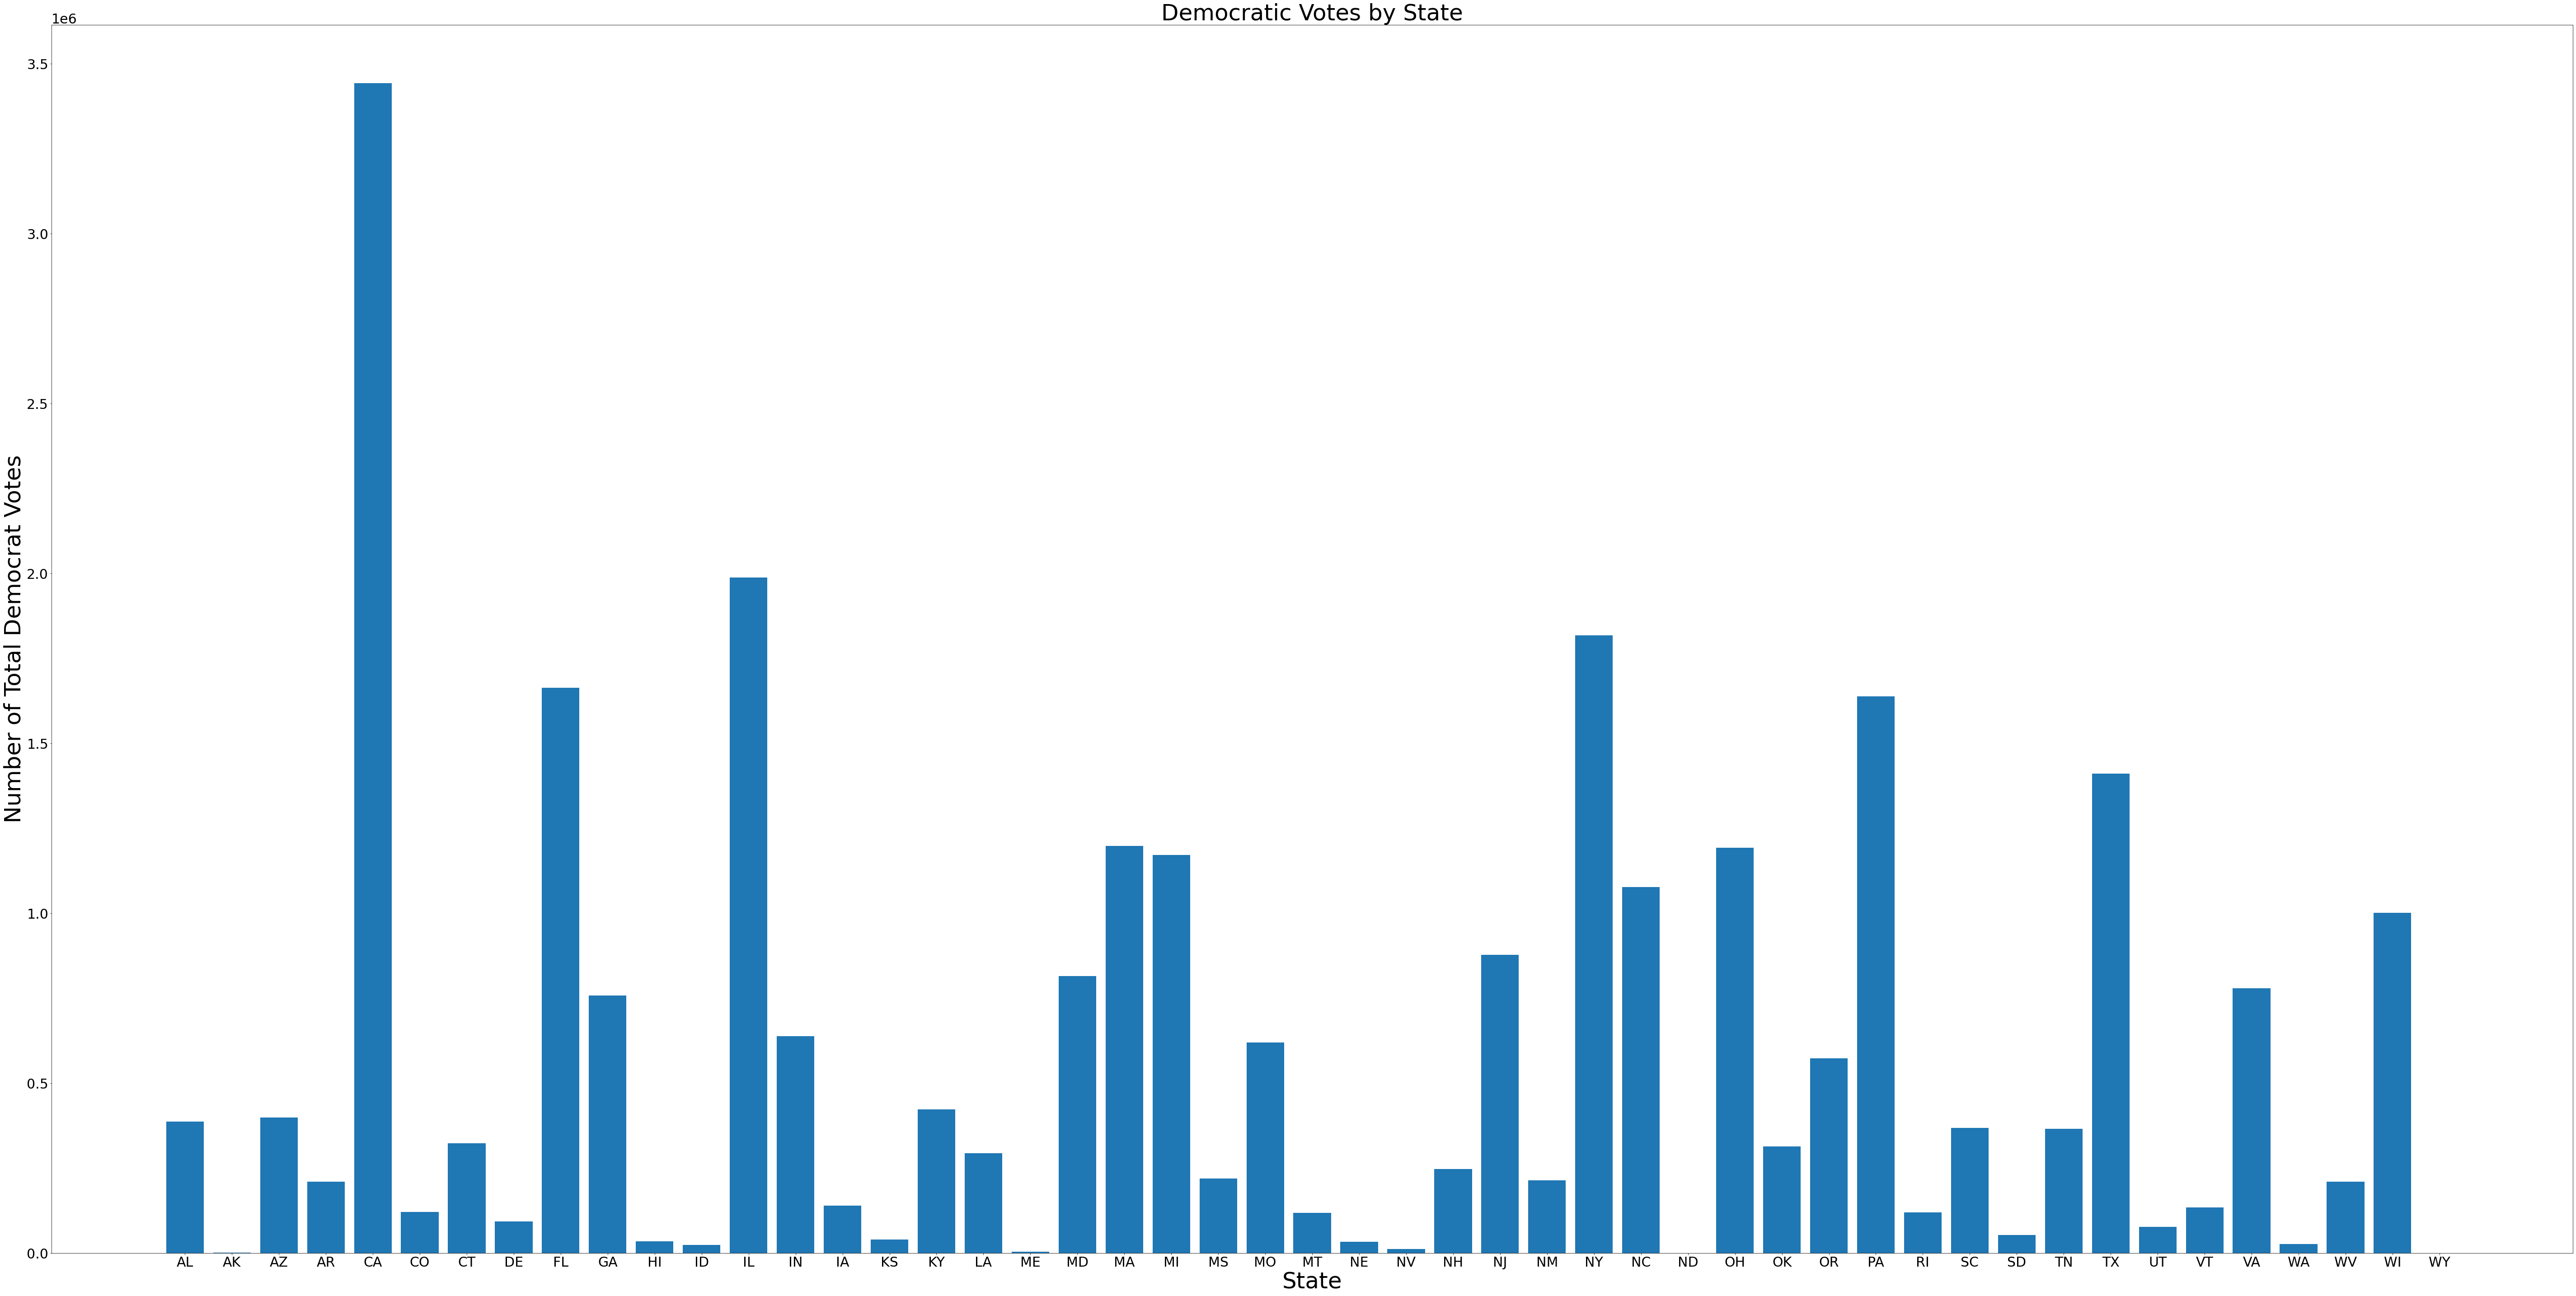

In [70]:
plt.figure(figsize = (100,50))
plt.bar(range(len(demVotesByState)), list(demVotesByState.values()), align='center')
plt.xticks(range(len(demVotesByState)), list(demVotesByState.keys()))

plt.xlabel('State', fontsize = 50)
plt.ylabel('Number of Total Democrat Votes', fontsize = 50)
plt.title("Democratic Votes by State", fontsize = 50)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)

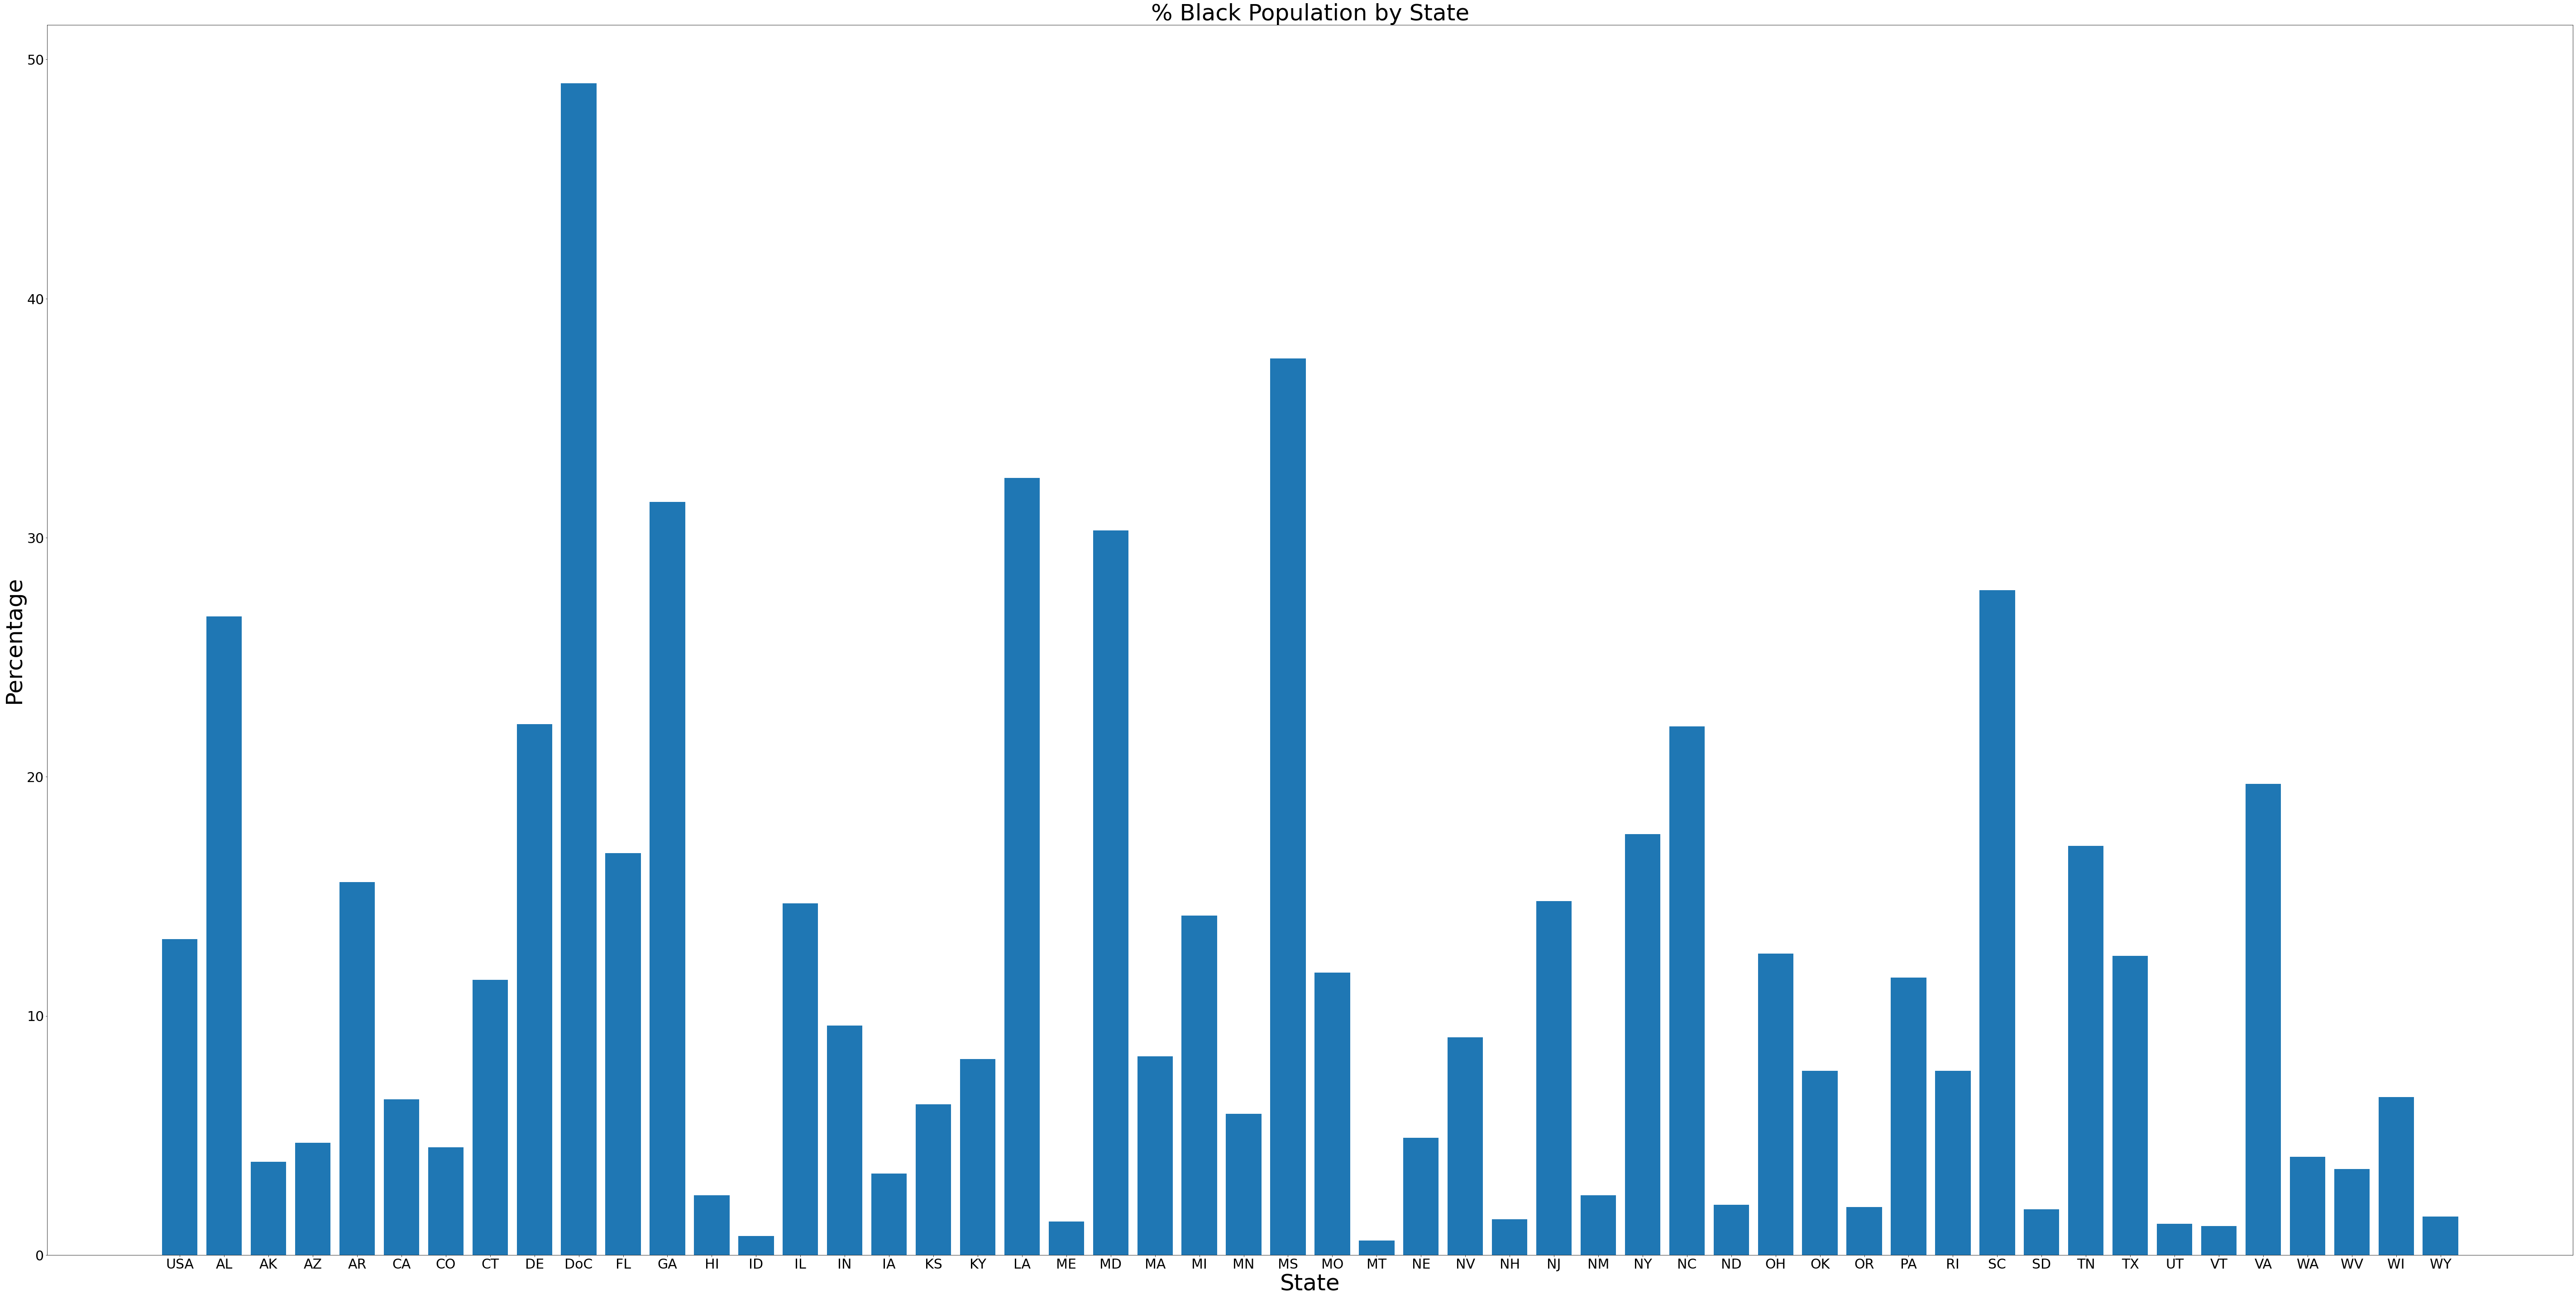

In [74]:
abr2 = ['USA', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DoC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
percBlackByState = dict(zip(demoUS_States['Area Name'], demoUS_States['% Black']))
percBlackByState

plt.figure(figsize = (100,50))
plt.bar(range(len(percBlackByState)), list(percBlackByState.values()), align='center')
plt.xticks(range(len(percBlackByState)), abr2)

plt.xlabel('State', fontsize = 50)
plt.ylabel('Percentage', fontsize = 50)
plt.title("% Black Population by State", fontsize = 50)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)

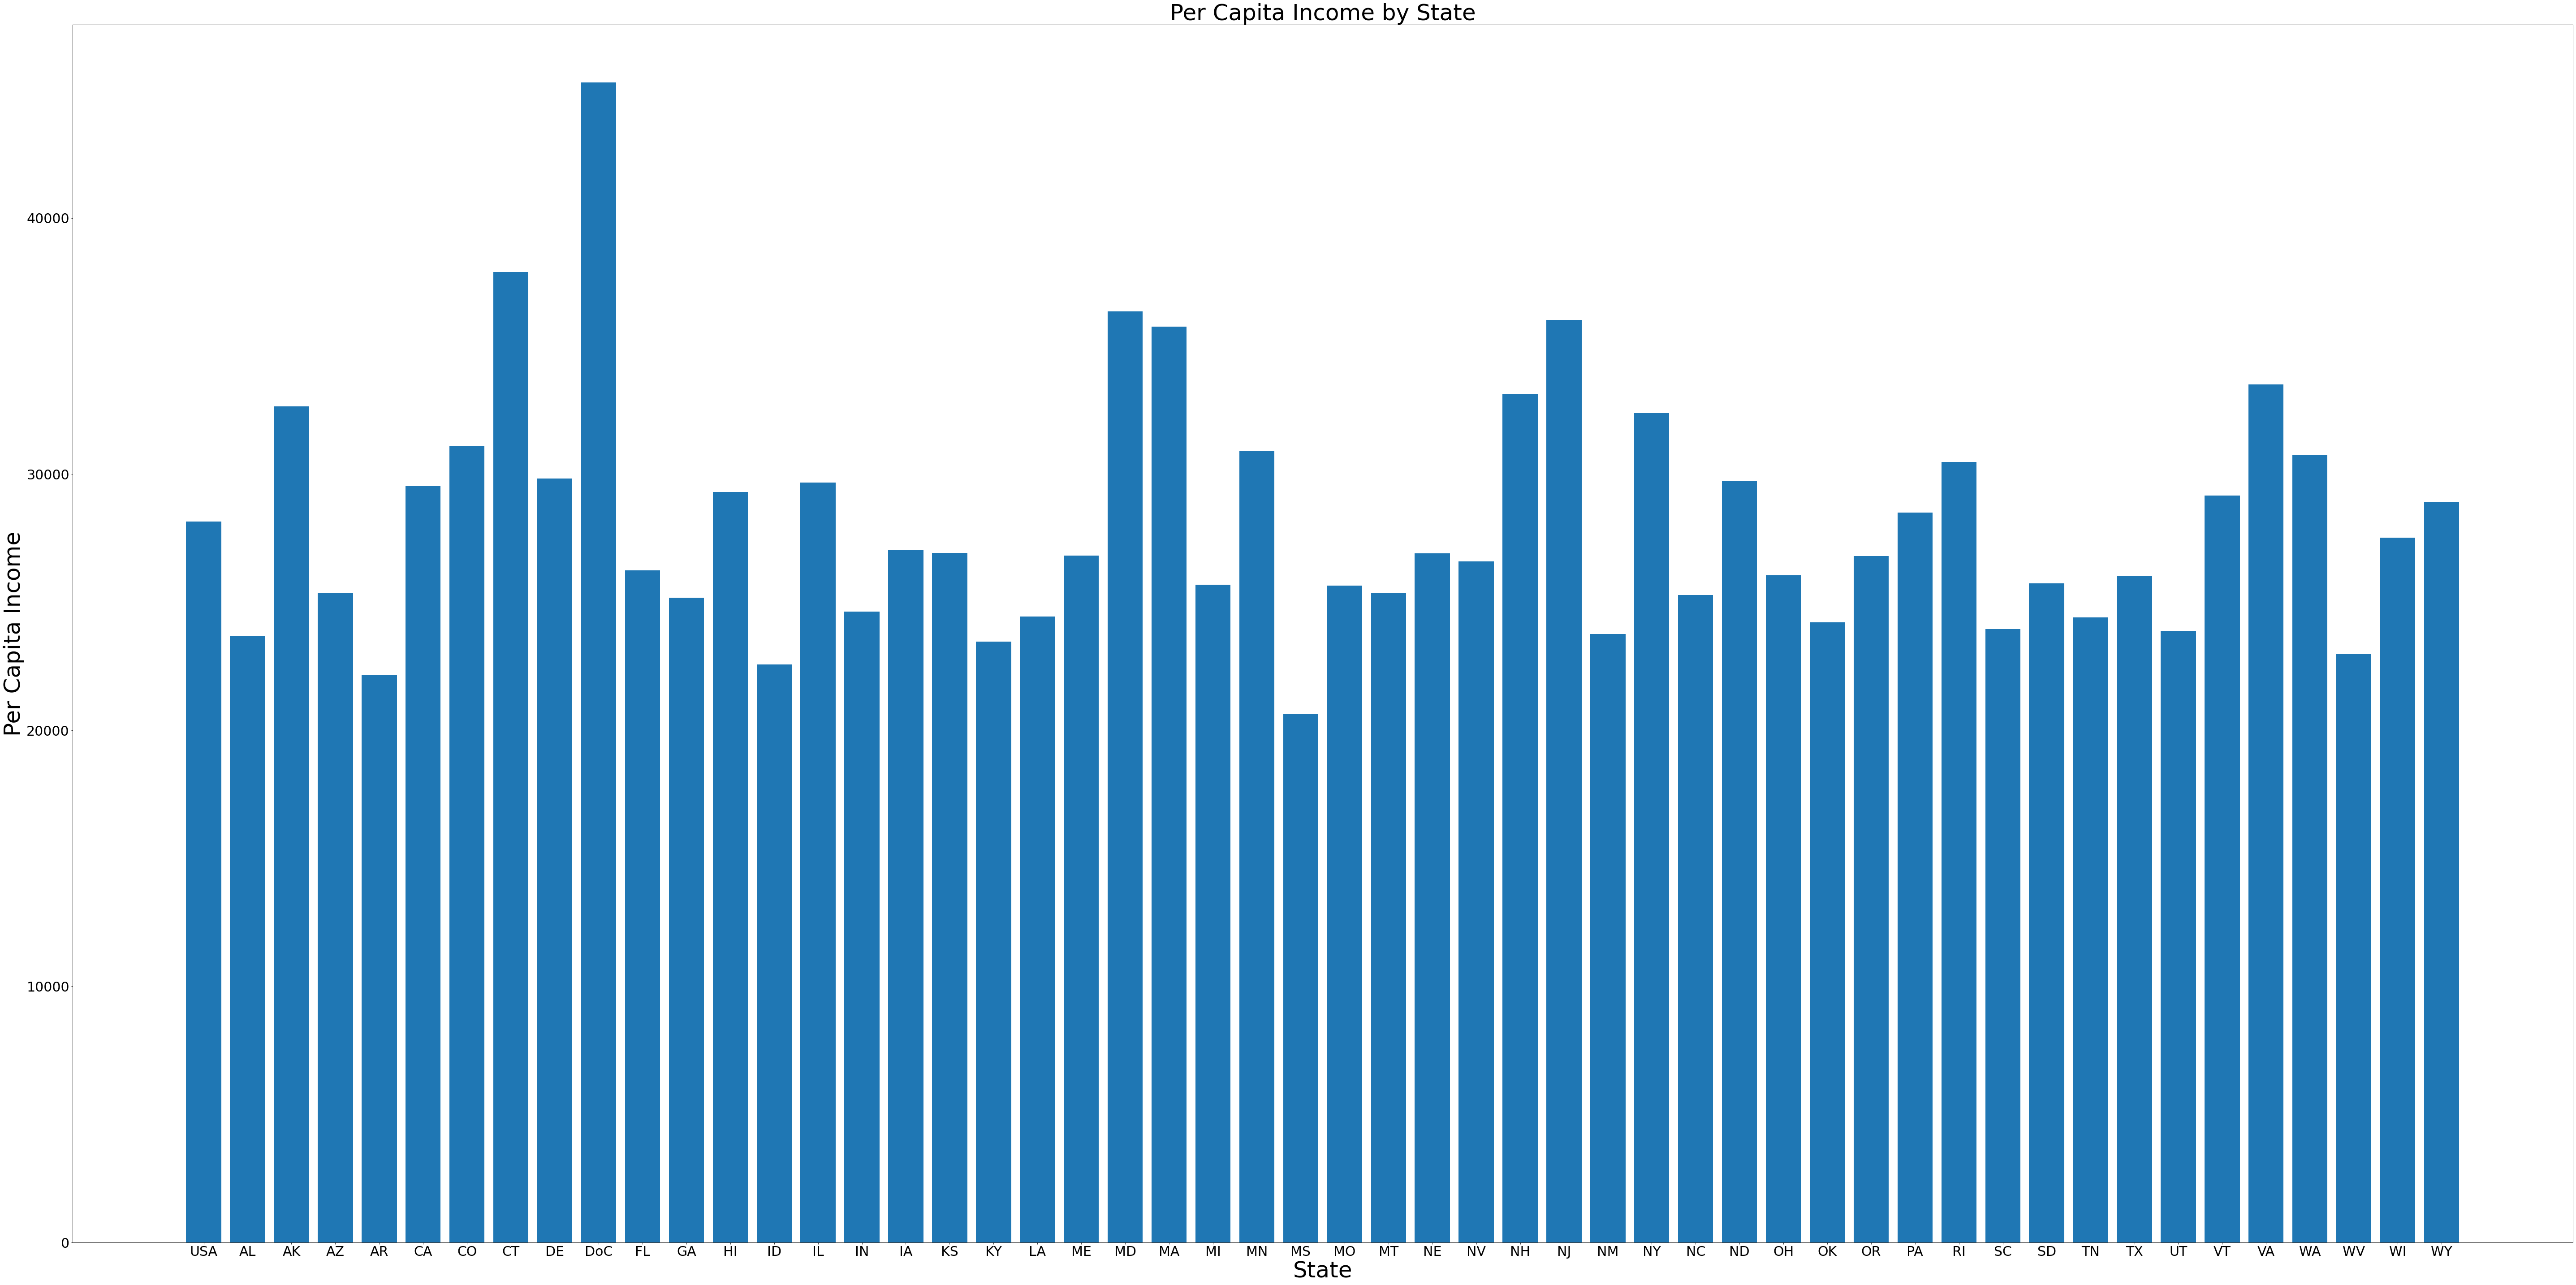

In [77]:
abr2 = ['USA', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DoC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
percIncByState = dict(zip(demoUS_States['Area Name'], demoUS_States['Per Capita Inc']))
percIncByState

plt.figure(figsize = (100,50))
plt.bar(range(len(percIncByState)), list(percIncByState.values()), align='center')
plt.xticks(range(len(percIncByState)), abr2)

plt.xlabel('State', fontsize = 50)
plt.ylabel('Per Capita Income', fontsize = 50)
plt.title("Per Capita Income by State", fontsize = 50)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)

# Conclusion

Through the use of models such as a confusion matrix, random forest, and feature importances, we have concluded that we are able to predict the 2016 primary election results with roughly 81% accuracy (based off our ROC score). We are able to do this by combining our demographic data set with our results data set. Comparing how features such as age, income, race, and area population relate to the results for each county in the United States. Specific features such as % white population and HO rate are classified as more influential in determining whether or not a county will vote red or blue.

Visualizing parts of demographic and results data can also help establish a solid prediction for the outcome of an election. We chose to visualize 5 graphs to see how they would compare to one another: % population with Bachelor's degree or higher, number of republican votes by state, number of democratic votes per state, % black population by state, and per capita incomoe by state. It is interesting to note states such as Florida, which have a relatively low % black population and per capita income, but the second highest total number of republican votes. We realize some of this data may be skewed due to total population, but when looking at the total number of democratic votes in Florida, it is much lower in comparison to other states with smaller populations.

# References

https://medium.com/vinod-b/who-will-win-the-2020-presidential-election-4e495378cae5

https://link.springer.com/article/10.1007/s40092-017-0238-2

http://www.jatit.org/volumes/research-papers/Vol4No11/2Vol4No11.pdf